# 과제
1. 코드의 빈칸 - (??) 을 채워 데이터 전처리를 완성해 주세요.
ex. (1.??) <- 이 부분을 채워 주시면 됩니다.<br>
빈칸은 총 5개입니다.
2. 실습 코드를 참고하여 DT & Ensemble 모델을 구현한 후 퀴즈에 답해주시면 됩니다.

**구현한 코드와 그 결과를 꼭 기록해 주세요**. 밑의 문제를 복사하셔서 **코드 가장 밑에 텍스트 셀을 추가한 후** 본인의 답을 적어주시면 됩니다.
시각화 문제는 코드에 구현이 되어있다면 텍스트 셀에 따로 사진을 첨부하실 필요는 없습니다.<br>
정답이 정해져 있지 않은 문제들도 있으니 결과보다는 코드의 내용에 포커스를 맞춰 주시면 좋을 것 같습니다 !

<퀴즈>


Decision Tree
1. 하이퍼파라미터가 criterion = 'entropy', max_depth = 3, random_state = 10인 Decision Tree를 구현했을 때, Accuracy는 얼마인가요?(소수점 둘째자리까지 반올림해 주세요.)
2. 총 테스트 개수와 오류 개수는 각각 몇 개인가요?
3. graphiz 모듈을 이용해 decision tree를 시각화해 보세요.
4. Grid Search를 사용하여 구한 최적의 max_depth, min_samples_split 파라미터의 값은 무엇인가요?

Bagging
1. 하이퍼파라미터가 criterion = 'entropy', n_estimators = 3, max_depth = 2, random_state = 10인 Random Forest를 구현했을 때, Accuracy는 얼마인가요?(소수점 둘째짜리까지 반올림해 주세요.)
2. Grid Search를 사용하여 구한 최적의 max_depth, min_samples_split, n_estimators 파라미터의 값은 무엇인가요?
3. matplotlib을 사용해 각 feature의 중요도를 시각화해 보세요.
4. 가장 중요한 feature은 무엇인가요?
5. Random Forest를 confustion_matrix를 사용하여 성능 평가를 진행해보세요.


Boosting
1. 하이퍼파라미터가 n_estimators = 5, learning_rate = 0.1인 Adaboost를 구현했을 때, Accuracy는 얼마인가요?(소수점 둘째자리까지 반올림해 주세요.)
2. Grid Search를 사용하여 구한 최적의 learning_rate, n_estimators는 무엇인가요?
3. 하이퍼파라미터가 max_depth = 2, min_samples_split = 11, learning_rate = 0.0001인 GBM을 구현했을 때, Accuracy는 얼마인가요?(소수점 둘째자리까지 반올림해 주세요.)
4. Grid Search를 사용하여 구한 최적의 learning_rate, max_depth, min_samples_split, n_estimators는 무엇인가요?
5. GBM을 confustion_matrix를 사용하여 성능 평가를 진행해보세요.

In [3]:
#구글 드라이브 접속 권한 획득
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 전처리

In [4]:
#필요한 라이브러리를 import
import numpy as np
import pandas as pd

#csv파일 읽어오기
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/2023-2/0720_DT&ENSEMBLE/data/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
#데이터의 통계량 확인
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#데이터 타입 및 non-null count확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#결측치 확인
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

null값이 없는 것을 확인할 수 있다.
하지만 모델을 훈련시킬 때는 숫자형 데이터여야 하는데, 모든 데이터가 문자형으로 이루어져 있다. 따라서 데이터를 숫자형으로 변환해주어야 한다.

이 작업은 sklearn에서 제공하는 LabelEncoder를 사용하여 수행한다. LabelEncoder은 컬럼의 모든 값을 숫자로 변환해준다.

**이 방법을 사용하려면 datatype이 'category'여야 한다.**

'object' datatype을 'category' datatype으로 변환해 주자.

In [8]:
df = df.astype('category')
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [48]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

해당 데이터의 'veil-type'라는 컬럼은 하나의 고유 값만 가지고 있으므로 데이터에 아무 것도 기여하지 못한다. 따라서 제거해야 하는 컬럼이다.

In [10]:
df = df.drop(["veil-type"], axis=1)

# Train set과 Test set 분할

우리가 타깃값으로 설정해야 하는 컬럼은 'class'이다.

**numpy array**의 형태로 X값과 y값을 설정해준다.

In [55]:
x = df.drop(['class'], axis=1)
y = df['class']

from sklearn.model_selection import train_test_split

#8:2의 비율로 train set과 test set를 분할해준다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10, stratify = y)

In [56]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,2,1,7,7,2,1,0,7,4,2


# 모델 구현


## Decision Tree

1. 하이퍼파라미터가 criterion = 'entropy', max_depth = 3, random_state = 10인 Decision Tree를 구현했을 때, Accuracy는 얼마인가요?(소수점 둘째자리까지 반올림해 주세요.) -> **Accuracy:, 0.95**
2. 총 테스트 개수와 오류 개수는 각각 몇 개인가요?
  -> **총 테스트 개수:1625, 오류 개수:79**
3. graphiz 모듈을 이용해 decision tree를 시각화해 보세요.
4. Grid Search를 사용하여 구한 최적의 max_depth, min_samples_split 파라미터의 값은 무엇인가요?
  -> **{'max_depth': 7, 'min_samples_split': 2}**

In [12]:
from sklearn.tree import DecisionTreeClassifier
#entropy를 불순도 계산 방법으로 적용
tree = DecisionTreeClassifier(criterion = 'entropy',
                              max_depth = 3,
                              random_state = 10)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

#sklearn에서 제공하는 metrics로 accuracy 평가
from sklearn import metrics
print(f"Accuracy:, {metrics.accuracy_score(y_test, y_pred):.2f}")
print("총 테스트 개수:%d, 오류 개수:%d" %(len(y_test), (y_test!=y_pred).sum()))

Accuracy:, 0.95
총 테스트 개수:1625, 오류 개수:79


In [14]:
from sklearn.model_selection import GridSearchCV

#테스트하고자 하는 파라미터 값들을 사전타입으로 정의
#max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparams = {'max_depth': list(range(2, 8)),
                  'min_samples_split': list(range(2, 20))}

GridCV = GridSearchCV(estimator = tree,
                      param_grid = hyperparams,
                      cv = 5)

GridCV.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              random_state=10),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18,
                                               19]})

In [15]:
GridCV.best_params_

{'max_depth': 7, 'min_samples_split': 2}

In [16]:
GridCV.best_score_

1.0

## Bagging


1. 하이퍼파라미터가 criterion = 'entropy', n_estimators = 3, max_depth random_state = 10인 Random Forest를 구현했을 때, Accuracy는 얼마인가요?(소수점 둘째짜리까지 반올림해 주세요.)
  -> **1.00**
2. Grid Search를 사용하여 구한 최적의 max_depth, min_samples_split, n_estimators 파라미터의 값은 무엇인가요?
  -> **{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}**
3. matplotlib을 사용해 각 feature의 중요도를 시각화해 보세요.
4. 가장 중요한 feature은 무엇인가요?
  -> **odor**
5. Random Forest를 confustion_matrix를 사용하여 성능 평가를 진행해보세요.

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy',
                                n_estimators = 3,
                                random_state = 10)
#n_estimaotrs는 데이터 샘플을 몇 개까지 만들 것이냐는 의미이다.
#의사결정트리를 5개 만드는 것
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
print('RandomForest accuracy:{:.3f}'.format(metrics.accuracy_score(y_test, forest_pred)))

RandomForest accuracy:1.000


In [20]:
#GridSearch로 최적의 파라미터 찾기
#이번에는 n_estimators까지 범위를 지정하는 것으로 hyperparameter를 수정해준다.
hyperparams2 = {'n_estimators': [10, 100, 500],
                'max_depth': list(range(2, 8)),
                'min_samples_split': list(range(2, 10))}

grid_forest = GridSearchCV(estimator = forest,
                      param_grid = hyperparams2,
                      cv = 5)
grid_forest.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=3, random_state=10),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [10, 100, 500]})

In [21]:
grid_forest.best_params_

{'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 100}

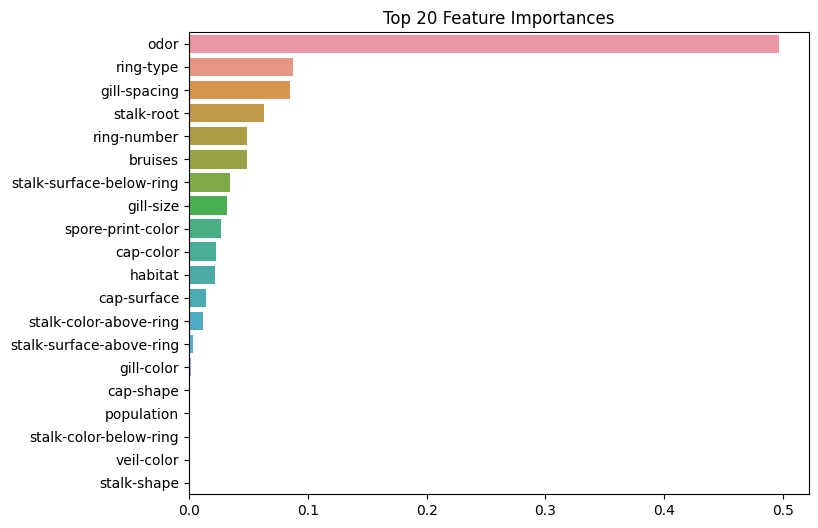

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = forest.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()

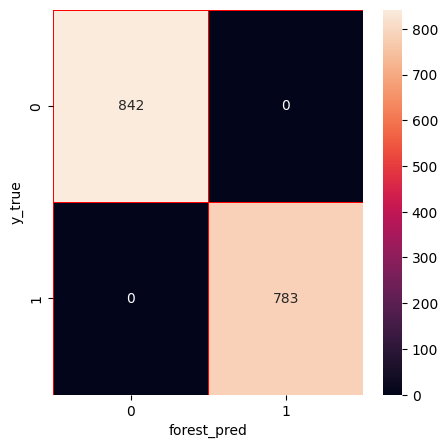

In [76]:
from sklearn.metrics import confusion_matrix
#Random Forest
y_true = y_test
forest_cm = confusion_matrix(y_true, forest_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(forest_cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("forest_pred")
plt.ylabel("y_true")
plt.show()


## Boosting


1. 하이퍼파라미터가 n_estimators = 5, learning_rate = 0.1인 Adaboost를 구현했을 때, Accuracy는 얼마인가요?(소수점 둘째자리까지 반올림해 주세요.)
  -> **0.84**
2. Grid Search를 사용하여 구한 최적의 learning_rate, n_estimators는 무엇인가요?
  -> **{'learning_rate': 1, 'n_estimators': 100}**

3. 하이퍼파라미터가 max_depth = 2, min_samples_split = 11, learning_rate = 0.0001인 GBM을 구현했을 때, Accuracy는 얼마인가요?(소수점 둘째자리까지 반올림해 주세요.)
  -> **0.52**

4. Grid Search를 사용하여 구한 최적의 learning_rate, max_depth, min_samples_split, n_estimators는 무엇인가요?
  -> **
5. GBM을 confustion_matrix를 사용하여 성능 평가를 진행해보세요.

In [70]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(n_estimators = 5,
                              learning_rate = 0.1)

adaboost.fit(x_train, y_train)
adaboost_pred = adaboost.predict(x_test)
print('Adaboost accuracy:{:.2f}'.format(metrics.accuracy_score(y_test, adaboost_pred)))

Adaboost accuracy:0.84


In [71]:
hyperparams3 = {'n_estimators': [5, 10, 100],
                'learning_rate': [0.01, 0.1, 1]}

grid_adaboost = GridSearchCV(adaboost,
                             param_grid = hyperparams3,
                             cv = 5)
grid_adaboost.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.1, n_estimators=5),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [5, 10, 100]})

In [72]:
grid_adaboost.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(max_depth = 2,
                                 min_samples_split = 11,
                                 learning_rate = 0.0001)
gbm.fit(x_train, y_train)
gbm_pred = gbm.predict(x_test)

print('GBM accuracy:{:.2f}'.format(metrics.accuracy_score(y_test,gbm_pred)))

GBM accuracy:0.52


In [77]:
hyperparams4 = {'n_estimators': [5, 10, 100],
                'max_depth': list(range(2, 8)),
                'min_samples_split': list(range(2, 10)),
                'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1]}

grid_gbm = GridSearchCV(gbm,
                      param_grid = hyperparams4,
                      cv = 5)
grid_gbm.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
grid_gbm.best_params_